# Reto Analisis de Datos en estacion Juarez

Lo primero que se debe de hacer en este trabajo es cargar nuestros datos que ya hemos limpiado, es decir, que se tienen solo los datos de la estacion de Juarez junto con las fechas y las banderas. Al mismo tiempo, tenemos que cargar las librerias que se utilzaran en los analisis posteriormente.

In [209]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot  as plt
from matplotlib.pyplot import Figure
from sklearn import linear_model
from scipy import stats

In [210]:
df = pd.read_excel('Datos.xlsx')
# Si encontramos problemas al leer lo datos correr la siguiente linea de codigo
# pip install openpyxl

En los datos especificos se nos menciona que en esta estacion debemos de restarle 0.36 a la variable SR.

In [211]:
del df['Unnamed: 0']
df['SR'] = df['SR'] - 0.36
df['SR'] = df['SR'].apply(lambda x : x if x > 0 else 0)

Vamos a separar los contaminantes y los datos meteorologicos en su propia data frame y, al mismo tiempo hacerlo para que no tengan banderas para tener los datos estandarizados.

In [212]:
nom_cont = ['CO','NO','PM10','PM 2.5','Nox','O3','SO2','NO2']
nom_dmet = ['TOUT','RH','SR','RAINF','PRS','WS','WD']

contaminantes = df.loc[:, nom_cont].values
dat_met = df.loc[:, nom_dmet].values

## PCA ignorando banderas

Tenemos que arreglar el problema de tener valores perdidos, por lo que hacemos que la informacion de los valores perdidos se convierta en valores que no nos afectarian mucho en nuestro analisis. Esto es antes de hacer busquedas en todas las banderas, por lo que este analisis tendra un menor peso en validez a comparacion del siguiente analisis.

In [145]:
imp_meancont = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_meandmet = SimpleImputer(missing_values=np.nan, strategy='mean')

imp_meancont.fit(contaminantes)
imp_meandmet.fit(dat_met)

SimpleImputer()

SimpleImputer()

In [146]:
contaminantes = imp_meancont.transform(contaminantes)
dat_met = imp_meandmet.transform(dat_met)

In [147]:
contaminantes = StandardScaler().fit_transform(contaminantes)
dat_met = StandardScaler().fit_transform(dat_met)

In [148]:
pca = PCA(n_components=2)

pc_cont = pca.fit_transform(contaminantes)
pc_datmet = pca.fit_transform(contaminantes)

pr_cont_df = pd.DataFrame(data = pc_cont, columns = ['Principal Component 1', 'Principal Component 2'])
pr_datmet_df = pd.DataFrame(data = pc_datmet, columns = ['Principal Component 1', 'Principal Component 2'])

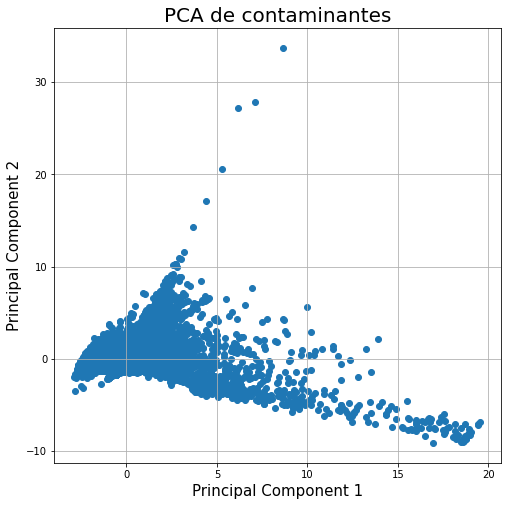

In [149]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA de contaminantes', fontsize = 20)

ax.scatter(pr_cont_df['Principal Component 1'],pr_cont_df['Principal Component 2'])
ax.grid()


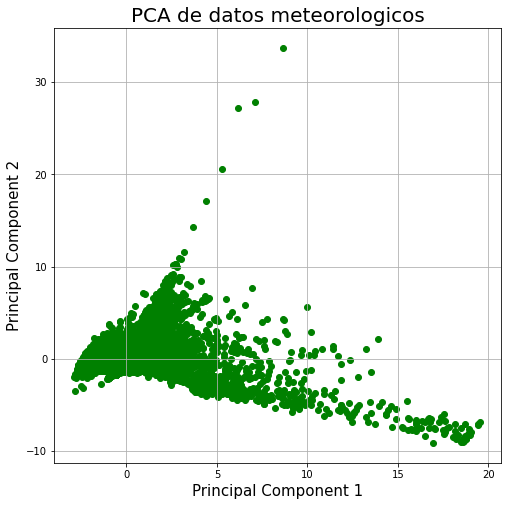

In [150]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA de datos meteorologicos', fontsize = 20)

ax.scatter(pr_datmet_df['Principal Component 1'],pr_datmet_df['Principal Component 2'], c = 'g')
ax.grid()

Como podemos observar, la distribucion de ambos contaminantes y datos meteorologicos es la misma, por lo que tenemos que hacer algunas transformaciones a nuestras variables en la siguiente seccion.

## Transformaciones con banderas a Contaminantes

Como obsevamos en la seccion pasada, los plots que se tienen en nuestra base de datos no son excepcionales, por lo que esperamos hacer algunas tranformaciones a nuestras variables dependiendo de sus banderas antes de separarlas.

Primero haremos un filtro en el contaminante CO y continuaremos en orden con todos los contaminantes.

### CO

In [213]:
for index, row in df.iterrows():
    if df.loc[index,'CO B'] == 'a':
        if df.loc[index,'CO'] <= 0.05:
            df.loc[index,'CO'] = np.nan

### NO

In [152]:
df['NO B'].unique()

array([nan, 'p', 'e', 'n', 's', 'l'], dtype=object)

In [214]:
for index, row in df.iterrows():
    if df.loc[index,'NO B'] == 'p':
        df.loc[index,'NO'] = np.nan
    elif df.loc[index,'NO B'] == 'e':
        df.loc[index,'NO'] = np.nan

### PM10

In [154]:
df['PM10 B'].unique()

array([nan, 'p', 'a', 'l', 'o', 'm', 'x', 'n', 's'], dtype=object)

In [215]:
pm900 = {}
for index, row in df.iterrows():
    if df.loc[index,'PM10 B'] == 'p':
        df.loc[index,'PM10'] = np.nan
    elif df.loc[index,'PM10 B'] == 'a':
        if df.loc[index,'PM10'] <= 5:
            df.loc[index,'PM10'] = np.nan
    elif df.loc[index,'PM10 B'] == 'o':
        nom = str(index)
        pm900[nom] = df.loc[index,'PM10']


x,n no existen en nuestras banderas y l,m,s no hacen ningun cambio importante que se tenga que hacer en nuestro codigo.

### PM 2.5

In [156]:
df['PM 2.5 B'].unique()

array(['a', 'x', 'n', nan, 'r', 'l', 's'], dtype=object)

In [216]:
for index, row in df.iterrows():
    if df.loc[index,'PM 2.5 B'] == 'a':
        df.loc[index,'PM 2.5'] = np.nan

### NOx

In [158]:
df['Nox B'].unique()

array([nan, 'p', 'e', 's', 'n', 'l'], dtype=object)

In [217]:
for index, row in df.iterrows():
    if df.loc[index,'Nox B'] == 'p':
        df.loc[index,'Nox'] = np.nan
    elif df.loc[index,'Nox B'] == 'e':
        df.loc[index,'Nox'] = np.nan


### O3

In [160]:
df['O3 B'].unique()

array([nan, 's', 'p', 'e', 'm', 'n', 'x', 'l', 'o'], dtype=object)

In [218]:
for index, row in df.iterrows():
    if df.loc[index,'O3 B'] == 'p':
        df.loc[index,'O3'] = np.nan
    elif df.loc[index,'O3 B'] == 'e':
        df.loc[index,'O3'] = np.nan
    if df.loc[index,'O3'] <= -5000:
        df.loc[index,'O3'] = np.nan


### SO2

In [162]:
df['SO2 B'].unique()

array([nan, 's', 'p', 'e', 'l', 'n', 'x'], dtype=object)

In [219]:
for index, row in df.iterrows():
    if df.loc[index,'SO2 B'] == 'p':
        df.loc[index,'SO2'] = np.nan
    elif df.loc[index,'SO2 B'] == 'e':
        df.loc[index,'SO2'] = np.nan

### NO2

In [164]:
df['NO2 B'].unique()

array([nan, 'p', 'e', 'l', 'u', 'n', 's'], dtype=object)

In [220]:
for index, row in df.iterrows():
    if df.loc[index,'NO2 B'] == 'p':
        df.loc[index,'NO2'] = np.nan
    elif df.loc[index,'NO2 B'] == 'e':
        df.loc[index,'NO2'] = np.nan

## Transformacion con banderas a Datos Meteorologicos

En esta seccion haremos lo mismo que se hizo en la seccion de Contaminantes pero con nuestros datos meteorologicos.

### TOUT

In [166]:
df['TOUT B'].unique()

array([nan, 'p', 'x', 's', 'n', 'k'], dtype=object)

In [221]:
for index, row in df.iterrows():
    if df.loc[index,'TOUT B'] == 'p':
        df.loc[index,'TOUT'] = np.nan

### RH

In [168]:
df['RH B'].unique()

array([nan, 'p', 's', 'x', 'n', 'l'], dtype=object)

In [222]:
for index, row in df.iterrows():
    if df.loc[index,'RH B'] == 'p':
        df.loc[index,'RH'] = np.nan
    if df.loc[index, 'RH'] <= -1000:
        df.loc[index,'RH'] = np.nan

### SR

In [170]:
df['SR B'].unique()

array([nan, 'p', 'x', 'n', 'l'], dtype=object)

In [223]:
for index, row in df.iterrows():
    if df.loc[index,'SR B'] == 'p':
        df.loc[index,'SR'] = np.nan

### RAINF

In [172]:
df['RAINF B'].unique()

array([nan, 'p', 'x', 'n', 'l'], dtype=object)

In [224]:
for index, row in df.iterrows():
    if df.loc[index,'RAINF B'] == 'p':
        df.loc[index,'RAINF'] = np.nan

### PRS

In [174]:
df['PRS B'].unique()

array([nan, 'p', 'k', 'x', 'n', 'l'], dtype=object)

In [225]:
for index, row in df.iterrows():
    if df.loc[index,'PRS B'] == 'p':
        df.loc[index,'PRS'] = np.nan

### WS

In [176]:
df['WS B'].unique()

array([nan, 's', 'p', 'l', 'n', 'x'], dtype=object)

In [226]:
for index, row in df.iterrows():
    if df.loc[index,'WS B'] == 'p':
        df.loc[index,'WS'] = np.nan

### WD

In [178]:
df['WD B'].unique()

array(['x', 's', nan, 'p', 'l', 'n'], dtype=object)

In [227]:
for index, row in df.iterrows():
    if df.loc[index,'WD B'] == 'p':
        df.loc[index,'WD'] = np.nan

## PCA con filtro de banderas

Ahora que nuestros datos fueron filtrados segun sus banderas es hora de hacer un analisis de PCA

In [228]:
df.to_excel('DatosR.xlsx')

In [298]:
nom_cont = ['CO','NO','PM10','PM 2.5','Nox','O3','SO2','NO2']
nom_dmet = ['TOUT','RH','SR','RAINF','PRS','WS','WD']

contaminantes = df.loc[:, nom_cont].values
dat_met = df.loc[:, nom_dmet].values

In [297]:
dat_met = dat_met[dat_met < 50]

In [299]:
imp_meancont = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_meandmet = SimpleImputer(missing_values=np.nan, strategy='mean')

imp_meancont.fit(contaminantes)
imp_meandmet.fit(dat_met)

SimpleImputer()

SimpleImputer()

In [302]:
contaminantes = imp_meancont.transform(contaminantes)
dat_met = imp_meandmet.transform(dat_met)

In [303]:
contaminantes = StandardScaler().fit_transform(contaminantes)
dat_met = StandardScaler().fit_transform(dat_met)

In [278]:
pca = PCA(n_components=2)
pc_cont = pca.fit_transform(contaminantes)
pr_cont_df = pd.DataFrame(data = pc_cont, columns = ['Principal Component 1', 'Principal Component 2'])

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[1.9888481  1.49413087]
[0.2485997  0.18676162]
[0.2485997  0.43536132]


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.18676162, 0.19294543, 0.19912923, 0.20531304, 0.21149685,
        0.21768066, 0.22386447, 0.23004828, 0.23623208, 0.24241589,
        0.2485997 ]),
 <BarContainer object of 10 artists>)

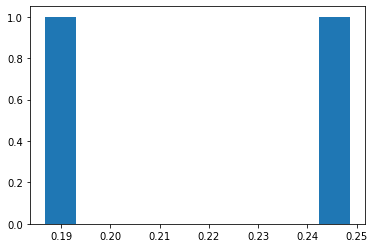

In [273]:
plt.hist(pca.explained_variance_ratio_)

In [304]:
pca = PCA(n_components=2)
pc_datmet = pca.fit_transform(dat_met)
pr_datmet_df = pd.DataFrame(data = pc_datmet, columns = ['Principal Component 1', 'Principal Component 2'])

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[1.95718177 1.16049479]
[0.2795903  0.16578076]
[0.2795903  0.44537106]


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.14967425, 0.16007249, 0.17047072, 0.18086896, 0.19126719,
        0.20166543, 0.21206366, 0.2224619 , 0.23286013, 0.24325837,
        0.2536566 ]),
 <BarContainer object of 10 artists>)

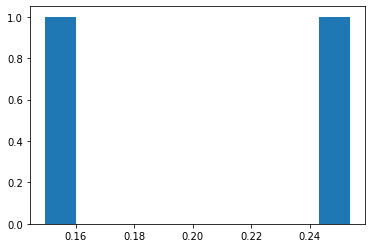

In [271]:
plt.hist(pca.explained_variance_ratio_)

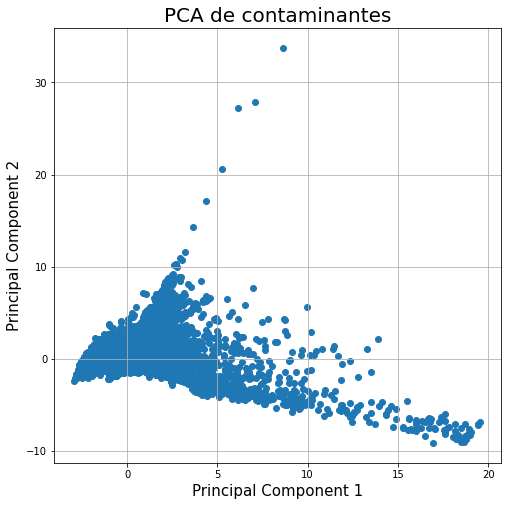

In [300]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA de contaminantes', fontsize = 20)

ax.scatter(pr_cont_df['Principal Component 1'],pr_cont_df['Principal Component 2'])
ax.grid()

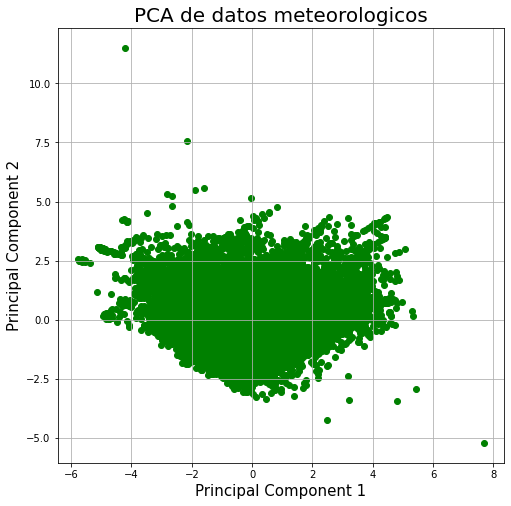

In [305]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA de datos meteorologicos', fontsize = 20)

ax.scatter(pr_datmet_df['Principal Component 1'],pr_datmet_df['Principal Component 2'], c = 'g')
ax.grid()

## Analisis de Regresion

In [187]:
import statsmodels.api as sm

Ahora que ya observamos nuestros dos analisis de PCA es hora de hacer otros analisis. En este caso estaremos haciendo un analisis de regresion.

In [188]:
nom_cont = ['Fecha','CO','NO','PM10','PM 2.5','Nox','O3','SO2','NO2','TOUT']
contaminantes = df.loc[:, nom_cont]

In [189]:
contaminantes = contaminantes[contaminantes['Fecha'] > '2021-01-01 00:00:00']
nom_dmet = ['Fecha','TOUT', 'RH', 'SR', 'RAINF', 'PRS', 'WS', 'WD']
meteorologicos = df.loc[:, nom_dmet]
meteorologicos = meteorologicos[meteorologicos['Fecha'] > '2021-01-01 00:00:00']

In [190]:
contaminantes['PM10'] = contaminantes['PM10'].fillna(contaminantes['PM10'].mean()) 
contaminantes['NO'] = contaminantes['NO'].fillna(contaminantes['NO'].mean()) 
contaminantes['SO2'] = contaminantes['SO2'].fillna(contaminantes['SO2'].mean()) 
contaminantes['CO'] = contaminantes['CO'].fillna(contaminantes['CO'].mean()) 
contaminantes['NO'] = contaminantes['NO'].fillna(contaminantes['NO'].mean()) 
contaminantes['PM 2.5'] = contaminantes['PM 2.5'].fillna(contaminantes['PM 2.5'].mean()) 
contaminantes['Nox'] = contaminantes['Nox'].fillna(contaminantes['Nox'].mean())
contaminantes['O3'] = contaminantes['O3'].fillna(contaminantes['O3'].mean())
contaminantes['NO2'] = contaminantes['NO2'].fillna(contaminantes['NO2'].mean())
meteorologicos['TOUT'] = meteorologicos['TOUT'].fillna(meteorologicos['TOUT'].mean())
meteorologicos['RH'] = meteorologicos['RH'].fillna(meteorologicos['RH'].mean())
meteorologicos['SR'] = meteorologicos['SR'].fillna(meteorologicos['SR'].mean())
meteorologicos['RAINF'] = meteorologicos['RAINF'].fillna(meteorologicos['RAINF'].mean())
meteorologicos['PRS'] = meteorologicos['PRS'].fillna(meteorologicos['PRS'].mean())
meteorologicos['WS'] = meteorologicos['WS'].fillna(meteorologicos['WS'].mean())
meteorologicos['WD'] = meteorologicos['WD'].fillna(meteorologicos['WD'].mean())

In [191]:
X = contaminantes['CO']
y = contaminantes['SO2']  
reg = linear_model.LinearRegression()

In [192]:
model = sm.OLS(X, y).fit()
predictions = model.predict(X)

In [193]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     CO   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.627
Method:                 Least Squares   F-statistic:                              7296.
Date:                Sat, 11 Sep 2021   Prob (F-statistic):                        0.00
Time:                        12:13:12   Log-Likelihood:                         -7520.2
No. Observations:                4342   AIC:                                  1.504e+04
Df Residuals:                    4341   BIC:                                  1.505e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SO2            0.2369      0.003     85.415      0.000       0.231       0.242
==============================================================================
Omnibus:                     2853.699   Durbin-Watson:                   0.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120948.533
Skew:                          -2.558   Prob(JB):                         0.00
Kurtosis:                      28.345   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
X = np.array(X).reshape((-1, 1))
y = np.array(y)
reg.fit(X,y)

LinearRegression()

In [195]:
reg.coef_

array([1.35215216])

In [196]:
reg.intercept_

3.401162014834972

In [197]:
reg.score(X, y)

0.12397535057697118

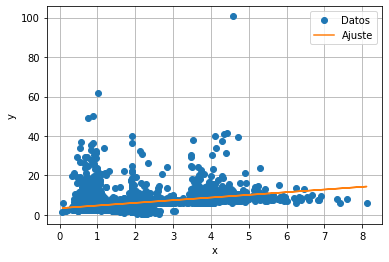

In [198]:
plt.plot(X,y,'o', label = "Datos")
plt.plot(X, reg.coef_*X+ reg.intercept_, label = "Ajuste")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## Comparativa individual

### Contaminantes

In [199]:
CO = contaminantes[['Fecha','CO']]
NO = contaminantes[['Fecha','NO']]
PM10 = contaminantes[['Fecha','PM10']]
PM25 = contaminantes[['Fecha','PM 2.5']]
NOx = contaminantes[['Fecha','Nox']]
O3 = contaminantes[['Fecha','O3']]
SO2 = contaminantes[['Fecha','SO2']]
NO2 = contaminantes[['Fecha','NO2']]

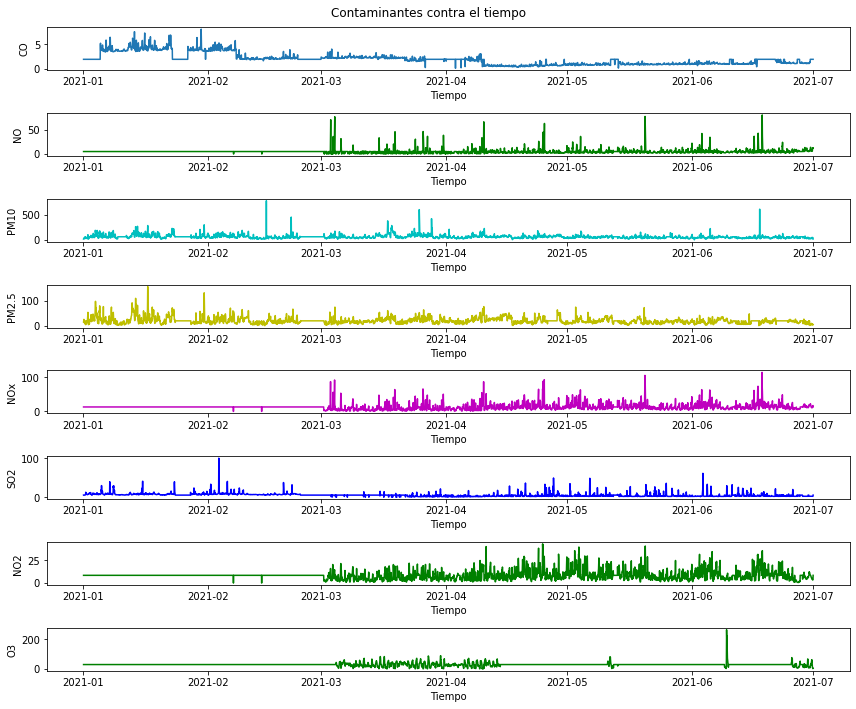

In [200]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1)
fig.suptitle('Contaminantes contra el tiempo')

ax1.plot(CO['Fecha'], CO['CO'])
ax1.set_ylabel('CO')
ax1.set_xlabel('Tiempo')

ax2.plot(NO['Fecha'], NO['NO'], c = 'g')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('NO')

ax3.plot(PM10['Fecha'], PM10['PM10'], c = 'c')
ax3.set_xlabel('Tiempo')
ax3.set_ylabel('PM10')

ax4.plot(PM25['Fecha'], PM25['PM 2.5'], c = 'y')
ax4.set_xlabel('Tiempo')
ax4.set_ylabel('PM2.5')

ax5.plot(NOx['Fecha'], NOx['Nox'], c = 'm')
ax5.set_xlabel('Tiempo')
ax5.set_ylabel('NOx')

ax6.plot(SO2['Fecha'], SO2['SO2'], c = 'b')
ax6.set_xlabel('Tiempo')
ax6.set_ylabel('SO2')

ax7.plot(NO2['Fecha'], NO2['NO2'], c = 'g')
ax7.set_xlabel('Tiempo')
ax7.set_ylabel('NO2')

ax8.plot(O3['Fecha'], O3['O3'], c = 'g')
ax8.set_xlabel('Tiempo')
ax8.set_ylabel('O3')

fig.set_figheight(10)
fig.set_figwidth(12)
fig.tight_layout()

plt.show()

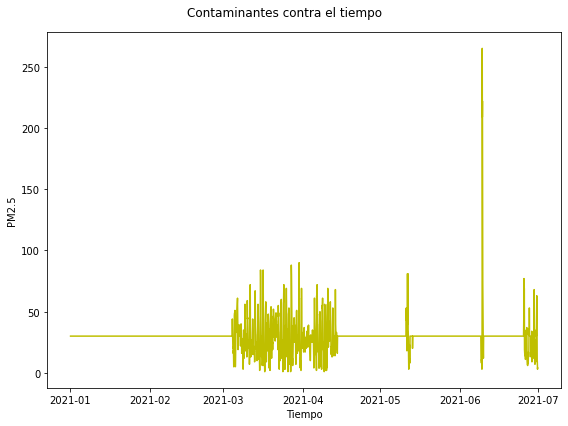

In [201]:
fig, (ax4) = plt.subplots(1, 1)
fig.suptitle('Contaminantes contra el tiempo')

ax4.plot(PM25['Fecha'], O3['O3'], c = 'y')
ax4.set_xlabel('Tiempo')
ax4.set_ylabel('PM2.5')

fig.set_figheight(6)
fig.set_figwidth(8)
fig.tight_layout()

plt.show()

### Datos Meteorologicos

In [202]:
TOUT = df[['Fecha','TOUT']]
RH = df[['Fecha','RH']]
SR = df[['Fecha','SR']]
PRS = df[['Fecha','PRS']]
WS = df[['Fecha','WS']]
WD = df[['Fecha','WD']]

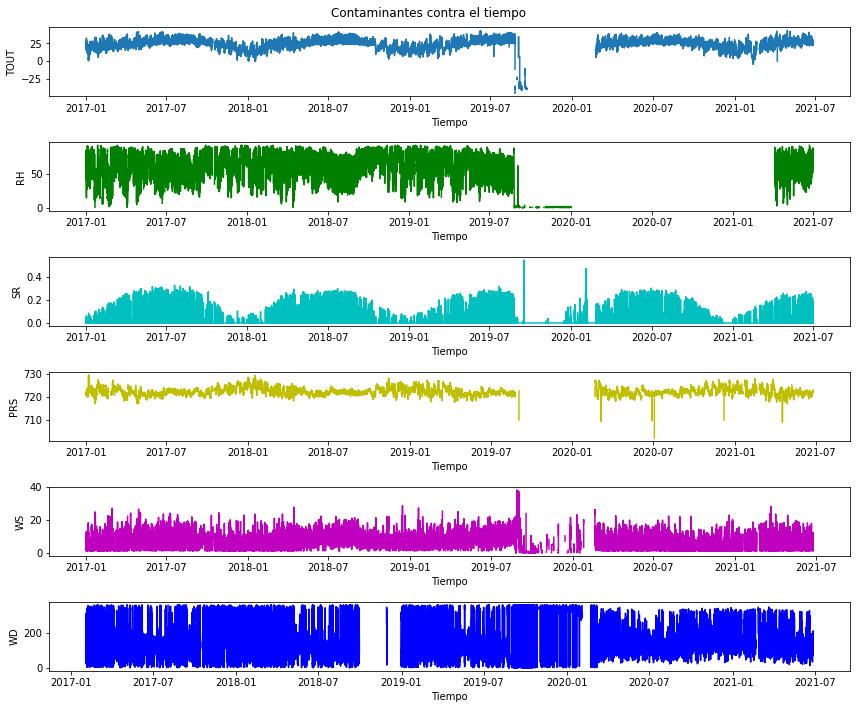

In [203]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1)
fig.suptitle('Contaminantes contra el tiempo')

ax1.plot(TOUT['Fecha'], TOUT['TOUT'])
ax1.set_ylabel('TOUT')
ax1.set_xlabel('Tiempo')

ax2.plot(RH['Fecha'], RH['RH'], c = 'g')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('RH')

ax3.plot(SR['Fecha'], SR['SR'], c = 'c')
ax3.set_xlabel('Tiempo')
ax3.set_ylabel('SR')

ax4.plot(PRS['Fecha'], PRS['PRS'], c = 'y')
ax4.set_xlabel('Tiempo')
ax4.set_ylabel('PRS')

ax5.plot(WS['Fecha'], WS['WS'], c = 'm')
ax5.set_xlabel('Tiempo')
ax5.set_ylabel('WS')

ax6.plot(WD['Fecha'], WD['WD'], c = 'b')
ax6.set_xlabel('Tiempo')
ax6.set_ylabel('WD')

fig.set_figheight(10)
fig.set_figwidth(12)
fig.tight_layout()

plt.show()